In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [2]:
file_path = "augusto_ds/processed_ds/1075.csv"
with open(file_path,"r") as f:
    table = pandas.read_csv(f)
table

,Unnamed: 0,id,score,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,...,19cd4deb02d2b5,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f
0,0,1000,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1001,15.2,4168,48.0,3968.0,2.0,44.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1002,11.0,1,14.0,245.0,14.0,53.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1003,15.4,4127,26.0,3934.0,2.0,31.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1004,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1071,993,16.0,4069,28.0,7665.0,6.0,87.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072,1072,994,6.2,0,1.0,2.0,8.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,1073,995,4.8,0,3.0,2.0,8.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,1074,996,9.8,1,14.0,245.0,14.0,44.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
table.shape

(1076, 449)

In [4]:
family = []

for i in range(len(table)):
    if 192<=table["id"][i]<=206:
        family.append("clop")
    elif(207<=table["id"][i]<=310):
        family.append("conti")
    elif(311<=table["id"][i]<=355):
        family.append("egregor")
    elif(403<=table["id"][i]<=435):
        family.append("lockbit")
    elif(438<=table["id"][i]<=451):
        family.append("lockbit")
    elif(452<=table["id"][i]<=468):
        family.append("mountlocker")
    elif(480<=table["id"][i]<=557):
        family.append("netwalker")
    elif(559<=table["id"][i]<=611):
        family.append("ryuk")
    elif(612<=table["id"][i]<=711):
        family.append("revil")
    elif(712<=table["id"][i]<=784):
        family.append("goodware")
    elif(791<table["id"][i]<1446):
        family.append("revil")
    else:
        family.append("unknown")

List of unknown values in the table (to remove):  
1446, 1451, 436, 437, 469 - 479, 558, 791

In [6]:
for i in range(len(family)):
    print(i, table['id'][i], family[i])

0 1000 revil
1 1001 revil
2 1002 revil
3 1003 revil
4 1004 revil
5 1005 revil
6 1006 revil
7 1007 revil
8 1008 revil
9 1009 revil
10 1010 revil
11 1011 revil
12 1012 revil
13 1013 revil
14 1014 revil
15 1015 revil
16 1018 revil
17 1019 revil
18 1020 revil
19 1021 revil
20 1022 revil
21 1023 revil
22 1024 revil
23 1025 revil
24 1026 revil
25 1027 revil
26 1028 revil
27 1029 revil
28 1030 revil
29 1031 revil
30 1032 revil
31 1033 revil
32 1034 revil
33 1035 revil
34 1036 revil
35 1037 revil
36 1038 revil
37 1039 revil
38 1041 revil
39 1042 revil
40 1043 revil
41 1044 revil
42 1045 revil
43 1046 revil
44 1047 revil
45 1048 revil
46 1049 revil
47 1050 revil
48 1051 revil
49 1052 revil
50 1053 revil
51 1054 revil
52 1055 revil
53 1057 revil
54 1059 revil
55 1061 revil
56 1064 revil
57 1065 revil
58 1066 revil
59 1067 revil
60 1068 revil
61 1069 revil
62 1071 revil
63 1072 revil
64 1074 revil
65 1075 revil
66 1076 revil
67 1077 revil
68 1079 revil
69 1080 revil
70 1081 revil
71 1082 revil
72

#The idea here is to merge the table with classifications, remove any rows labeled as unknown, then separate each malware type and test with binary classification.

Note: I can do this split at the end and continue using this notebook.

In [5]:
len(family)

1076

In [6]:
table.drop(columns=['score', 'id'], inplace=True)

In [7]:
table.drop(table.columns[0], axis=1, inplace=True)

The columns that are not relevant have been removed.

In [8]:
table


,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,SetErrorMode,NtCreateFile,NtClose,...,19cd4deb02d2b5,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f
0,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4168,48.0,3968.0,2.0,44.0,0.0,0.0,17.0,4417.0,5480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,14.0,245.0,14.0,53.0,1.0,5.0,258.0,83.0,486.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4127,26.0,3934.0,2.0,31.0,0.0,2.0,26.0,7670.0,29270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,4069,28.0,7665.0,6.0,87.0,0.0,3.0,256.0,8260.0,9122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1072,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1073,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1074,1,14.0,245.0,14.0,44.0,1.0,5.0,258.0,83.0,475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
table['family'] = family

In [10]:
table

,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,SetErrorMode,NtCreateFile,NtClose,...,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f,family
0,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
1,4168,48.0,3968.0,2.0,44.0,0.0,0.0,17.0,4417.0,5480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
2,1,14.0,245.0,14.0,53.0,1.0,5.0,258.0,83.0,486.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
3,4127,26.0,3934.0,2.0,31.0,0.0,2.0,26.0,7670.0,29270.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
4,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,4069,28.0,7665.0,6.0,87.0,0.0,3.0,256.0,8260.0,9122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
1072,0,1.0,2.0,8.0,1.0,1.0,2.0,3.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
1073,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil
1074,1,14.0,245.0,14.0,44.0,1.0,5.0,258.0,83.0,475.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,revil


In [11]:
# I will use this to split the dataframe by families to perform binary classification.
rem = table.loc[table['family'] == 'unknown']
rem

,added_files,LdrUnloadDll,NtReadFile,CreateActCtxW,NtOpenKey,SetFilePointer,SetUnhandledExceptionFilter,SetErrorMode,NtCreateFile,NtClose,...,20d46f118a5e92,26df34c6b83ece,34c40c3f22b377,046a416f4a41da,44f0c8fe6fd1c0,54f07b825fd662,74ce1be7fe3286,67a1130899695f,64f3d2db7a782f,family
356,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
357,0,3.0,2.0,8.0,2.0,1.0,2.0,3.0,1.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
555,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
556,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
588,0,0.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
589,5387,37.0,8963.0,3.0,79.0,25495.0,6.0,40.0,7697.0,8875.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
590,12,0.0,33.0,0.0,4.0,0.0,0.0,2.0,53.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
591,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
592,0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
593,0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown


In [12]:
items_to_remove = rem.index.values.tolist()
items_to_remove

[356,
 357,
 555,
 556,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 677,
 894]

In [13]:
# removing the unknowns based on the generated list
table.drop(table.index[items_to_remove], inplace=True)
'unknown' in table['family']

False

In [14]:
family_table = table

From here onward, the table no longer contains any unknowns in the list of families.

In [15]:
family = table['family']
table.drop(columns='family', inplace=True)

# Classifier Execution

In [16]:
Test_Size = 0.33

In [17]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(table, family, test_size=Test_Size, random_state=1)  

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Initial execution using KNN with GridSearch to determine the optimal parameters.

              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         1
       conti       0.78      0.94      0.85        31
     egregor       0.83      0.91      0.87        11
    goodware       0.59      0.62      0.60        21
     lockbit       0.93      0.78      0.85        18
 mountlocker       1.00      0.33      0.50         6
   netwalker       1.00      0.75      0.86        28
       revil       0.92      0.95      0.94       217
        ryuk       1.00      0.94      0.97        17

    accuracy                           0.89       350
   macro avg       0.79      0.69      0.72       350
weighted avg       0.90      0.89      0.89       350

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 6 μs, sys: 39 μs, total: 45 μs
Wall time: 6.91 μs


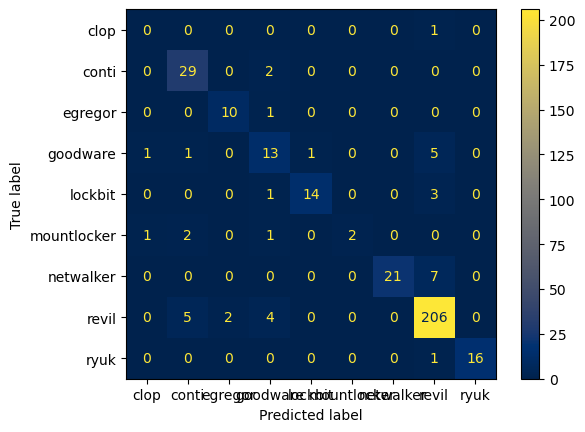

In [19]:
#KNN com GridSearch
param_gridKNN = {'n_neighbors': [1,3,5,7],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']} 
modelKNNgrid = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid.fit(train_features, train_labels)
predictKNNgrid = modelKNNgrid.predict(test_features)
print(metrics.classification_report(test_labels, predictKNNgrid))
print(modelKNNgrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid.classes_).plot(cmap='cividis')
%time

After updating the parameters to match those from Grid Search, the classification scores remained the same.

The “unknown” category was fully classified as other malware. Check the proximity of this classification within the list and adjust the list according to the obtained classification.

The best performance was achieved with k = 1.

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [23]:
# SVM com GridSearch
#param_gridsvm = {'C': [50], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
#modelsvmgrid = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm, n_jobs=-1, refit=True, cv=5, error_score='raise')
#modelsvmgrid.fit(previsores_treinamento, classe_treinamento)
#predictsvm = modelsvmgrid.predict(previsores_teste)
#print(metrics.classification_report(classe_teste, predictsvm))
#print(modelsvmgrid.best_params_)
#cm = metrics.confusion_matrix(classe_teste, predictsvm)
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid.classes_).plot(cmap='cividis')
#%time

Since using GRID was taking too long, I adjusted the parameters manually, and the best parameters are approximately C = 50 with a linear kernel.

              precision    recall  f1-score   support

        clop       0.11      1.00      0.20         1
       conti       0.93      0.87      0.90        31
     egregor       0.85      1.00      0.92        11
    goodware       0.78      0.86      0.82        21
     lockbit       0.70      0.78      0.74        18
 mountlocker       0.40      0.33      0.36         6
   netwalker       0.79      0.82      0.81        28
       revil       0.97      0.94      0.96       217
        ryuk       0.92      0.65      0.76        17

    accuracy                           0.89       350
   macro avg       0.72      0.81      0.72       350
weighted avg       0.91      0.89      0.90       350

CPU times: user 0 ns, sys: 1 μs, total: 1 μs
Wall time: 3.1 μs


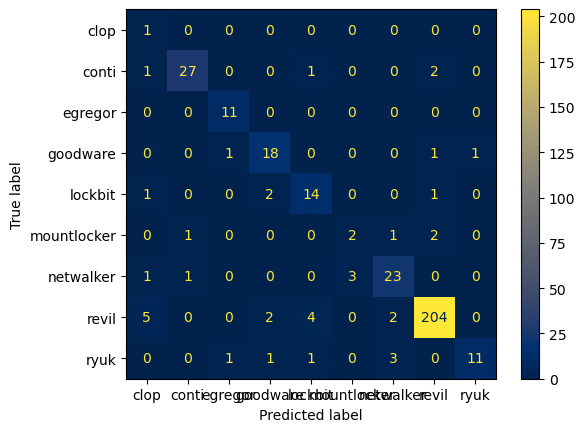

In [21]:
modelsvm = svm.SVC(gamma='auto', C=50, kernel='linear')
modelsvm.fit(train_features, train_labels)
predictsvm = modelsvm.predict(test_features)
print(metrics.classification_report(test_labels, predictsvm))
cm = metrics.confusion_matrix(test_labels, predictsvm)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvm.classes_).plot(cmap='cividis')
%time

Documenting the parameters that achieved the best performance

Add here the implementation with the best-performing SVM parameters to avoid re-running it each time (apply this to other SVM implementations in this notebook as well).

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

        clop       0.00      0.00      0.00         1
       conti       1.00      0.42      0.59        31
     egregor       0.14      1.00      0.24        11
    goodware       0.44      0.19      0.27        21
     lockbit       1.00      0.89      0.94        18
 mountlocker       0.40      0.33      0.36         6
   netwalker       0.74      0.61      0.67        28
       revil       0.98      0.82      0.89       217
        ryuk       0.92      0.71      0.80        17

    accuracy                           0.72       350
   macro avg       0.62      0.55      0.53       350
weighted avg       0.89      0.72      0.77       350

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 3.81 μs


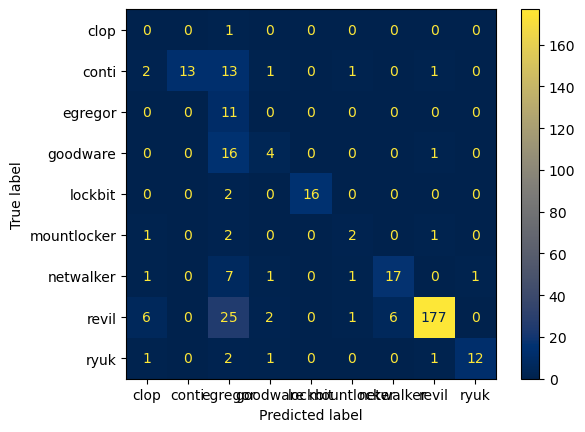

In [24]:
# Naive Bayes com GridSearch
# For Naive Bayes, there are no hyperparameters to adjust, so using Grid Search is unnecessary.
modelGNB = GaussianNB()
modelGNB.fit(train_features, train_labels)
previsaoGNB = modelGNB.predict(test_features)
print(metrics.classification_report(test_labels, previsaoGNB))
cm = metrics.confusion_matrix(test_labels, previsaoGNB)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB.classes_).plot(cmap='cividis')
%time

In [25]:
from sklearn import tree

              precision    recall  f1-score   support

        clop       0.50      1.00      0.67         1
       conti       1.00      0.94      0.97        31
     egregor       0.92      1.00      0.96        11
    goodware       1.00      0.90      0.95        21
     lockbit       0.94      0.94      0.94        18
 mountlocker       0.27      0.50      0.35         6
   netwalker       1.00      0.96      0.98        28
       revil       0.97      0.97      0.97       217
        ryuk       1.00      0.94      0.97        17

    accuracy                           0.95       350
   macro avg       0.85      0.91      0.86       350
weighted avg       0.96      0.95      0.96       350

{'criterion': 'entropy', 'max_depth': 10}
CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 1.91 μs


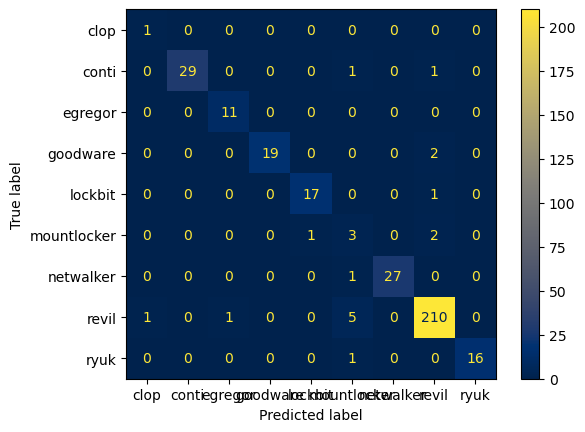

In [26]:
# Decision Tree com GridSearch
param_gridtree = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid.fit(train_features, train_labels)
predicttree = modeltreegrid.predict(test_features)
print(metrics.classification_report(test_labels, predicttree))
print(modeltreegrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid.classes_).plot(cmap='cividis')
%time

In [27]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

        clop       0.50      1.00      0.67         1
       conti       0.94      0.97      0.95        31
     egregor       1.00      1.00      1.00        11
    goodware       1.00      1.00      1.00        21
     lockbit       1.00      0.94      0.97        18
 mountlocker       1.00      0.33      0.50         6
   netwalker       0.93      0.93      0.93        28
       revil       0.98      0.99      0.98       217
        ryuk       1.00      1.00      1.00        17

    accuracy                           0.97       350
   macro avg       0.93      0.91      0.89       350
weighted avg       0.97      0.97      0.97       350

{'criterion': 'entropy', 'n_estimators': 81}
CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 2.86 μs


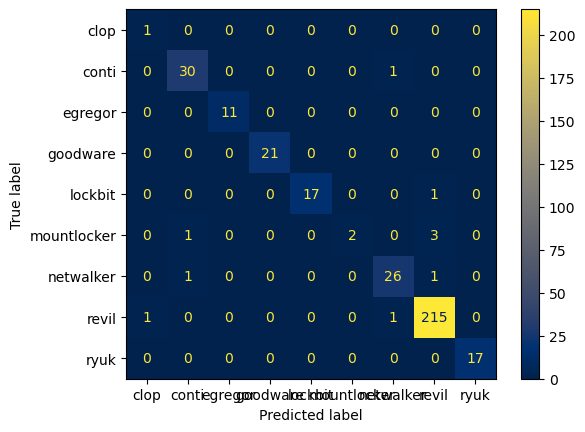

In [28]:
# RandomForest com GridSearch
#param_gridrf = {"n_estimators": [10,20,30,50,60,70,80,90,100], 'criterion':['gini', 'entropy']} 
# In the first attempt, the search stopped at 80. To find the optimal parameter, I conducted a new test ranging from 80 to 90.

param_gridrf = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid = GridSearchCV(RandomForestClassifier(), param_gridrf, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid.fit(train_features, train_labels)
predictrf = modelrfgrid.predict(test_features)
print(metrics.classification_report(test_labels, predictrf))
print(modelrfgrid.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid.classes_).plot(cmap='cividis')
%time

In [29]:
from sklearn.neural_network import MLPClassifier

In [32]:
# MLP com GridSearch
#param_gridmlp = {'hidden_layer_sizes': [(4,4), (50,50,50), (50,100,50), (100,)],'solver':['lbfgs', 'sgd','adam'],  'activation': ['logistic', 'relu', 'identity', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
#modelmlpgrid = GridSearchCV(MLPClassifier(hidden_layer_sizes=(4,4), max_iter=50000000, tol=0.0001, random_state = 12, verbose = True), param_gridmlp, n_jobs=-1, cv=5, error_score='raise')
#modelmlpgrid.fit(previsores_treinamento, classe_treinamento)
#predictmlp = modelmlpgrid.predict(previsores_teste)
#print(metrics.classification_report(classe_teste, predictmlp))
#print(modelmlpgrid.best_params_)
#cm = metrics.confusion_matrix(classe_teste, predictmlp)
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlpgrid.classes_).plot(cmap='cividis')
#%time

Iteration 1, loss = 24.84016416
Iteration 2, loss = 11.46254895
Iteration 3, loss = 9.58123192
Iteration 4, loss = 8.75258284
Iteration 5, loss = 7.44492507
Iteration 6, loss = 6.37557371
Iteration 7, loss = 5.37689977
Iteration 8, loss = 4.93963452
Iteration 9, loss = 4.38974694
Iteration 10, loss = 3.52352193
Iteration 11, loss = 2.89572740
Iteration 12, loss = 2.63893391
Iteration 13, loss = 2.29982318
Iteration 14, loss = 2.24987656
Iteration 15, loss = 2.01990895
Iteration 16, loss = 1.98340207
Iteration 17, loss = 1.82408472
Iteration 18, loss = 1.58695311
Iteration 19, loss = 1.54056643
Iteration 20, loss = 1.39706910
Iteration 21, loss = 1.28013050
Iteration 22, loss = 1.33100675
Iteration 23, loss = 1.09735528
Iteration 24, loss = 1.05293805
Iteration 25, loss = 0.89722222
Iteration 26, loss = 0.90616101
Iteration 27, loss = 0.83641092
Iteration 28, loss = 0.85052112
Iteration 29, loss = 0.81924523
Iteration 30, loss = 0.82729629
Iteration 31, loss = 0.80130300
Iteration 32, l

/Users/hanhf/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


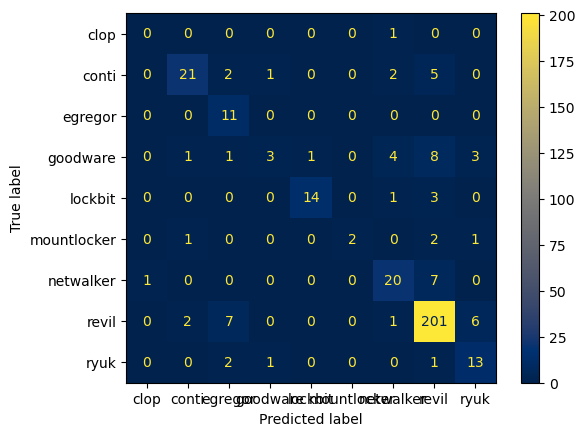

In [30]:
modelmlp = MLPClassifier(hidden_layer_sizes=(40,150,20), max_iter=50, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp.fit(train_features, train_labels)
predictmlp = modelmlp.predict(test_features)
print(metrics.classification_report(test_labels, predictmlp))
cm = metrics.confusion_matrix(test_labels, predictmlp)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp.classes_).plot(cmap='cividis')
%time

#Provide an overall summary of the classifications performed without the Standard Scaler for the API call approach

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
table_sc = sc.fit_transform(table)
table_sc

array([[-0.70240463, -0.23207058, -0.05680101, ..., -0.1554926 ,
        -0.03074377, -0.03074377],
       [ 0.86081814, -0.14518093, -0.0409471 , ..., -0.1554926 ,
        -0.03074377, -0.03074377],
       [-0.70202958, -0.20803727, -0.05582963, ..., -0.1554926 ,
        -0.03074377, -0.03074377],
       ...,
       [-0.70240463, -0.22837315, -0.05680101, ..., -0.1554926 ,
        -0.03074377, -0.03074377],
       [-0.70202958, -0.20803727, -0.05582963, ..., -0.1554926 ,
        -0.03074377, -0.03074377],
       [ 0.85931793, -0.1525758 ,  0.02217675, ..., -0.1554926 ,
        -0.03074377, -0.03074377]])

In [34]:
from sklearn.model_selection import train_test_split
train_features_sc, test_features_sc, train_labels, test_labels = train_test_split(table_sc, family, test_size=0.5, random_state=1)  

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Insert the Grid Search for the classifiers here, following the same approach used above

              precision    recall  f1-score   support

        clop       1.00      0.86      0.92         7
       conti       0.83      0.88      0.85        49
     egregor       0.73      1.00      0.84        19
    goodware       0.89      0.91      0.90        34
     lockbit       0.95      0.91      0.93        23
 mountlocker       0.00      0.00      0.00         8
   netwalker       0.92      0.92      0.92        38
       revil       0.97      0.96      0.96       326
        ryuk       0.96      0.96      0.96        26

    accuracy                           0.93       530
   macro avg       0.81      0.82      0.81       530
weighted avg       0.92      0.93      0.93       530

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 1 μs, sys: 1 μs, total: 2 μs
Wall time: 2.86 μs


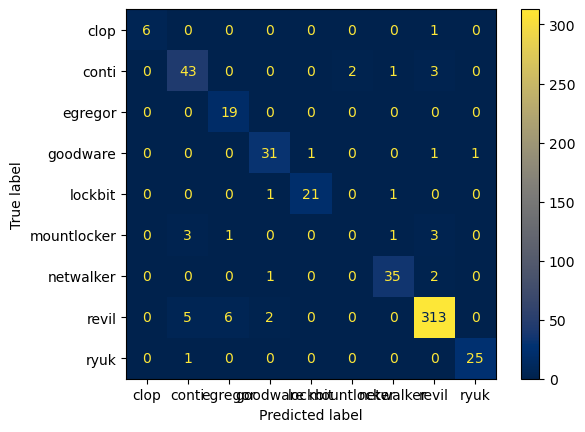

In [36]:
# KNN com Grid Search CV com StandardScaler
param_gridKNN_sc = {'n_neighbors': [1],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']} 
modelKNNgrid_sc = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_sc.fit(train_features_sc, train_labels)
predictKNNgrid_sc = modelKNNgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictKNNgrid_sc))
print(modelKNNgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_sc.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       1.00      0.86      0.92         7
       conti       0.81      0.90      0.85        49
     egregor       0.43      1.00      0.60        19
    goodware       0.83      0.88      0.86        34
     lockbit       0.94      0.65      0.77        23
 mountlocker       1.00      0.12      0.22         8
   netwalker       0.97      0.84      0.90        38
       revil       0.97      0.93      0.95       326
        ryuk       0.96      0.96      0.96        26

    accuracy                           0.90       530
   macro avg       0.88      0.79      0.78       530
weighted avg       0.93      0.90      0.90       530

{'C': 1, 'kernel': 'linear'}
CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 1.91 μs


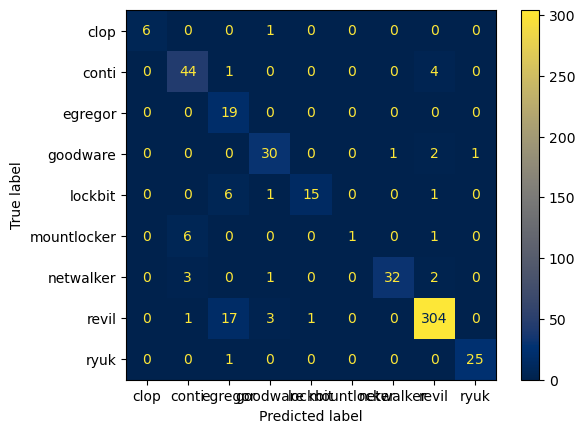

In [37]:
# SVM com Grid Search CV StandardScaler
param_gridsvm_sc = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_sc = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_sc.fit(train_features_sc, train_labels)
predictsvm_sc = modelsvmgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictsvm_sc))
print(modelsvmgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictsvm_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_sc.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.19      1.00      0.33         7
       conti       0.98      0.84      0.90        49
     egregor       1.00      1.00      1.00        19
    goodware       0.78      0.41      0.54        34
     lockbit       0.84      0.91      0.88        23
 mountlocker       0.27      0.75      0.40         8
   netwalker       0.89      0.84      0.86        38
       revil       1.00      0.94      0.97       326
        ryuk       0.96      0.85      0.90        26

    accuracy                           0.89       530
   macro avg       0.77      0.84      0.75       530
weighted avg       0.94      0.89      0.90       530

CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 2.15 μs


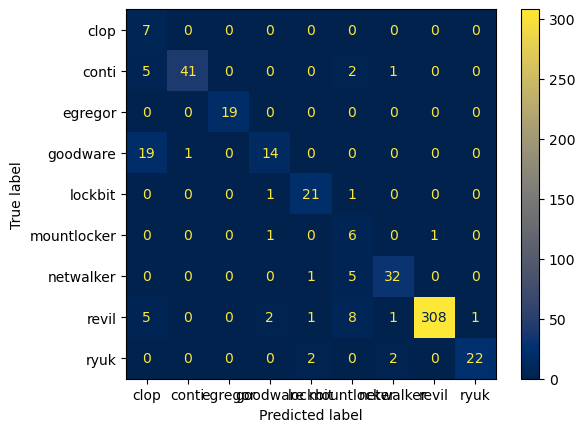

In [38]:
# Naive Bayes com StandardScaler
# For Naive Bayes, there are no hyperparameters to adjust, so using Grid Search is unnecessary.
modelGNB_sc = GaussianNB()
modelGNB_sc.fit(train_features_sc, train_labels)
previsaoGNB_sc = modelGNB_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, previsaoGNB_sc))
cm = metrics.confusion_matrix(test_labels, previsaoGNB_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_sc.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.67      0.86      0.75         7
       conti       0.96      0.94      0.95        49
     egregor       0.76      1.00      0.86        19
    goodware       0.76      0.91      0.83        34
     lockbit       0.84      0.91      0.88        23
 mountlocker       0.40      0.50      0.44         8
   netwalker       0.97      0.95      0.96        38
       revil       1.00      0.94      0.97       326
        ryuk       0.92      0.92      0.92        26

    accuracy                           0.93       530
   macro avg       0.81      0.88      0.84       530
weighted avg       0.94      0.93      0.94       530

{'criterion': 'gini', 'max_depth': 10}
CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 3.1 μs


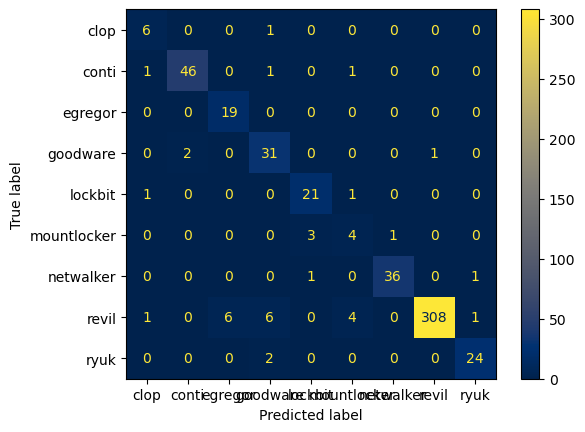

In [39]:
# Decision Tree com Grid Search CV StandardScaler
param_gridtree_sc = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_sc = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_sc, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_sc.fit(train_features_sc, train_labels)
predicttree_sc = modeltreegrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predicttree_sc))
print(modeltreegrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_sc.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       1.00      0.43      0.60         7
       conti       0.96      0.98      0.97        49
     egregor       0.95      1.00      0.97        19
    goodware       0.91      0.85      0.88        34
     lockbit       0.88      0.91      0.89        23
 mountlocker       0.75      0.38      0.50         8
   netwalker       0.92      0.95      0.94        38
       revil       0.98      0.99      0.98       326
        ryuk       1.00      1.00      1.00        26

    accuracy                           0.96       530
   macro avg       0.93      0.83      0.86       530
weighted avg       0.96      0.96      0.96       530

{'criterion': 'gini', 'n_estimators': 85}
CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 1.67 μs


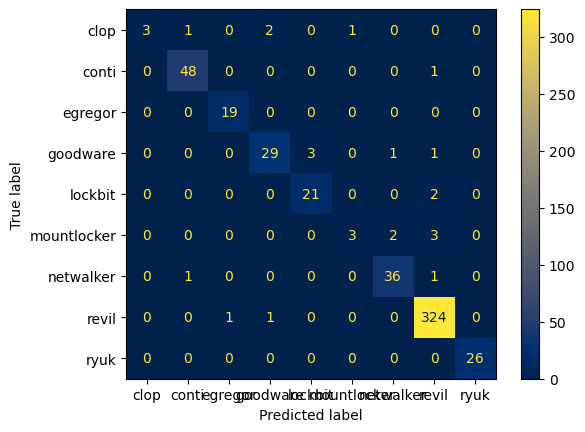

In [40]:
# Random Forest com Grid Search CV StandardScaler

#param_gridrf_sc = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

param_gridrf_sc = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_sc = GridSearchCV(RandomForestClassifier(), param_gridrf_sc, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_sc.fit(train_features_sc, train_labels)
predictrf_sc = modelrfgrid_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictrf_sc))
print(modelrfgrid_sc.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_sc.classes_).plot(cmap='cividis')
%time

In [43]:
# MLP com Grid Search CV StandardScaler

#param_gridmlp_sc = {'hidden_layer_sizes': [(4,4), (50,50,50), (50,100,50), (100,)],'solver':['lbfgs', 'sgd','adam'],  'activation': ['logistic', 'relu', 'identity', 'tanh'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant','adaptive']}
#modelmlpgrid_sc = GridSearchCV(MLPClassifier(hidden_layer_sizes=(4,4), max_iter=50000000, tol=0.0001, random_state = 12, verbose = True), param_gridmlp_sc, n_jobs=-1, cv=5, error_score='raise')
#modelmlpgrid_sc.fit(previsores_treinamento_sc, classe_treinamento)
#predictmlp_sc = modelmlpgrid_sc.predict(previsores_teste_sc)
#print(metrics.classification_report(classe_teste, predictmlp_sc))
#print(modelmlpgrid_sc.best_params_)
#cm = metrics.confusion_matrix(classe_teste, predictmlp_sc)
#metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictmlp_sc.classes_).plot(cmap='cividis')
#%time

Iteration 1, loss = 2.04571254
Iteration 2, loss = 1.79553634
Iteration 3, loss = 1.63383291
Iteration 4, loss = 1.48798465
Iteration 5, loss = 1.35359417
Iteration 6, loss = 1.23126702
Iteration 7, loss = 1.12242990
Iteration 8, loss = 1.03327965
Iteration 9, loss = 0.95153840
Iteration 10, loss = 0.88263159
Iteration 11, loss = 0.81907717
Iteration 12, loss = 0.76178738
Iteration 13, loss = 0.70494089
Iteration 14, loss = 0.65019328
Iteration 15, loss = 0.60075570
Iteration 16, loss = 0.54874289
Iteration 17, loss = 0.50018159
Iteration 18, loss = 0.45631339
Iteration 19, loss = 0.41978206
Iteration 20, loss = 0.38450730
Iteration 21, loss = 0.35409497
Iteration 22, loss = 0.32556928
Iteration 23, loss = 0.30295812
Iteration 24, loss = 0.28181274
Iteration 25, loss = 0.26270515
Iteration 26, loss = 0.24810518
Iteration 27, loss = 0.23223490
Iteration 28, loss = 0.22115717
Iteration 29, loss = 0.20835153
Iteration 30, loss = 0.19921424
Iteration 31, loss = 0.19000557
Iteration 32, los

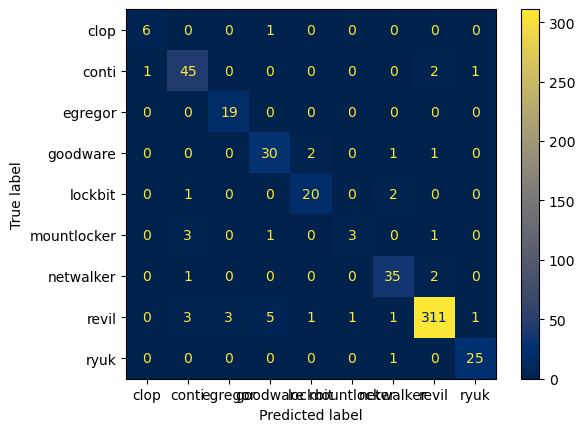

In [41]:
# MLP com Grid Search CV StandardScaler
modelmlp_sc = MLPClassifier(hidden_layer_sizes=(40,150,20), max_iter=50, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_sc.fit(train_features_sc, train_labels)
predictmlp_sc = modelmlp_sc.predict(test_features_sc)
print(metrics.classification_report(test_labels, predictmlp_sc))
cm = metrics.confusion_matrix(test_labels, predictmlp_sc)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_sc.classes_).plot(cmap='cividis')
%time

Clearly, the Standard Scaler contributed to an improvement in overall classification, although some individual metrics showed a decrease in accuracy.

No improvising! Use the Self-Organizing Map (SOM) only after everything else is finished, if there’s time!

Self-organizing Map: https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117

In [42]:
from sklearn.decomposition import PCA

In [43]:
# Is it possible to do Grid Search with PCA? What is the optimal number of parameters to improve classification?
pca = PCA(n_components=100) 
table_pca = pca.fit_transform(table_sc)

In [44]:
train_features_pca, test_features_pca, train_labels, test_labels = train_test_split(table_pca, family, test_size=0.5, random_state=1)  

              precision    recall  f1-score   support

        clop       1.00      0.86      0.92         7
       conti       0.91      0.88      0.90        49
     egregor       0.86      1.00      0.93        19
    goodware       0.86      0.91      0.89        34
     lockbit       0.95      0.91      0.93        23
 mountlocker       0.50      0.12      0.20         8
   netwalker       0.85      0.89      0.87        38
       revil       0.97      0.98      0.98       326
        ryuk       0.93      0.96      0.94        26

    accuracy                           0.94       530
   macro avg       0.87      0.84      0.84       530
weighted avg       0.94      0.94      0.94       530

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


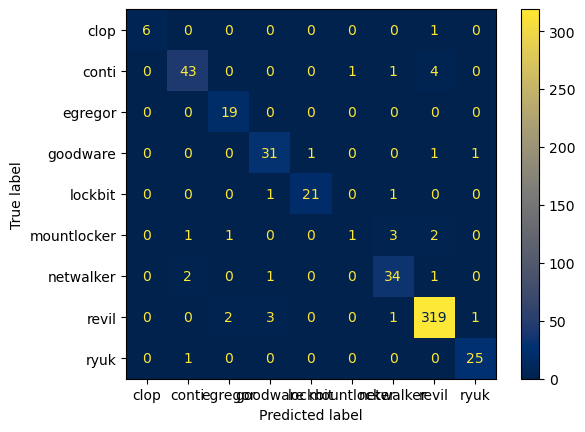

In [45]:
# KNN com GrideSarch e PCA
param_gridKNN_PCA = {'n_neighbors': [1,3,5,7,9],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']} 
modelKNNgrid_PCA = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid_PCA.fit(train_features_pca, train_labels)
predictKNNgrid_PCA = modelKNNgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictKNNgrid_PCA))
print(modelKNNgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictKNNgrid_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       1.00      0.86      0.92         7
       conti       0.85      0.90      0.87        49
     egregor       0.43      1.00      0.60        19
    goodware       0.81      0.85      0.83        34
     lockbit       0.75      0.65      0.70        23
 mountlocker       0.25      0.12      0.17         8
   netwalker       0.82      0.87      0.85        38
       revil       0.98      0.90      0.94       326
        ryuk       0.93      0.96      0.94        26

    accuracy                           0.88       530
   macro avg       0.76      0.79      0.76       530
weighted avg       0.90      0.88      0.89       530

{'C': 20, 'kernel': 'linear'}
CPU times: user 1 μs, sys: 0 ns, total: 1 μs
Wall time: 3.1 μs


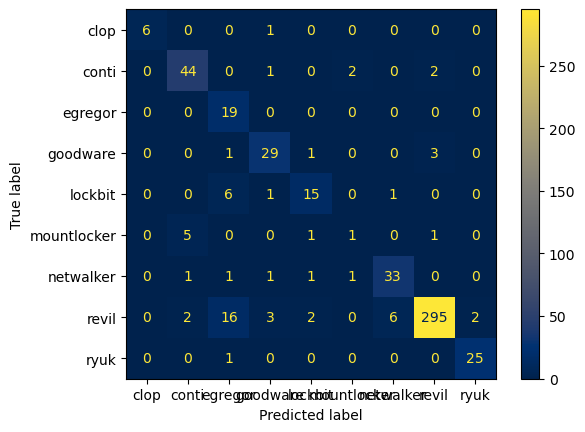

In [46]:
# SVM com Grid Search CV PCA
param_gridsvm_PCA = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid_PCA = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid_PCA.fit(train_features_pca, train_labels)
predictsvm_pca = modelsvmgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictsvm_pca))
print(modelsvmgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictsvm_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.33      0.86      0.48         7
       conti       0.31      0.82      0.44        49
     egregor       1.00      1.00      1.00        19
    goodware       0.14      0.24      0.18        34
     lockbit       0.26      0.48      0.33        23
 mountlocker       1.00      0.25      0.40         8
   netwalker       0.36      0.53      0.43        38
       revil       0.95      0.50      0.65       326
        ryuk       0.40      0.54      0.46        26

    accuracy                           0.53       530
   macro avg       0.53      0.58      0.49       530
weighted avg       0.74      0.53      0.57       530

CPU times: user 1 μs, sys: 1e+03 ns, total: 2 μs
Wall time: 3.1 μs


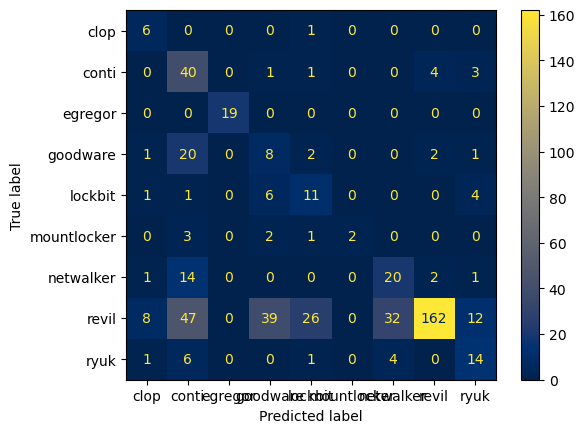

In [47]:
# Naive Bayes com PCA
# For Naive Bayes, there are no hyperparameters to adjust, so using Grid Search is unnecessary.
modelGNB_PCA = GaussianNB()
modelGNB_PCA.fit(train_features_pca, train_labels)
previsaoGNB_PCA = modelGNB_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, previsaoGNB_PCA))
cm = metrics.confusion_matrix(test_labels, previsaoGNB_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.67      0.86      0.75         7
       conti       0.96      0.94      0.95        49
     egregor       0.76      1.00      0.86        19
    goodware       0.76      0.91      0.83        34
     lockbit       0.84      0.91      0.88        23
 mountlocker       0.40      0.50      0.44         8
   netwalker       0.97      0.95      0.96        38
       revil       1.00      0.94      0.97       326
        ryuk       0.92      0.92      0.92        26

    accuracy                           0.93       530
   macro avg       0.81      0.88      0.84       530
weighted avg       0.94      0.93      0.94       530

{'criterion': 'gini', 'max_depth': 10}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 μs


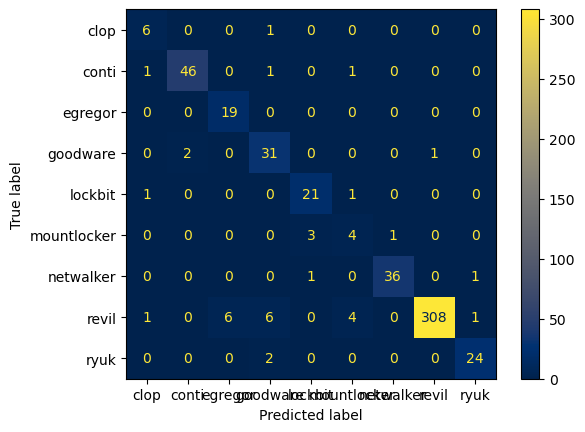

In [48]:
# Decision Tree com Grid Search CV e PCA
param_gridtree_PCA = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid_PCA = GridSearchCV(tree.DecisionTreeClassifier(random_state=9), param_grid=param_gridtree_PCA, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid_PCA.fit(train_features_sc, train_labels)
predicttree_PCA = modeltreegrid_PCA.predict(test_features_sc)
print(metrics.classification_report(test_labels, predicttree_PCA))
print(modeltreegrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predicttree_PCA)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modeltreegrid_PCA.classes_).plot(cmap='cividis')
%time

              precision    recall  f1-score   support

        clop       0.86      0.86      0.86         7
       conti       0.86      0.78      0.82        49
     egregor       1.00      1.00      1.00        19
    goodware       0.94      0.85      0.89        34
     lockbit       1.00      0.91      0.95        23
 mountlocker       0.00      0.00      0.00         8
   netwalker       1.00      0.87      0.93        38
       revil       0.91      0.98      0.95       326
        ryuk       1.00      0.96      0.98        26

    accuracy                           0.92       530
   macro avg       0.84      0.80      0.82       530
weighted avg       0.91      0.92      0.92       530

{'criterion': 'entropy', 'n_estimators': 83}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.86 μs


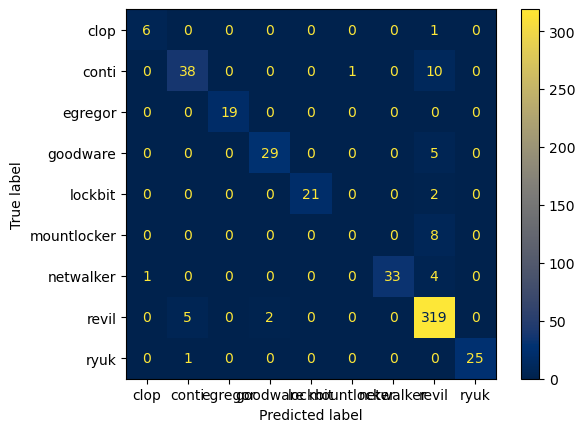

In [49]:
# Random Forest com Grid Search CV e PCA

#param_gridrf_PCA = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

param_gridrf_PCA = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid_PCA = GridSearchCV(RandomForestClassifier(), param_gridrf_PCA, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid_PCA.fit(train_features_pca, train_labels)
predictrf_pca = modelrfgrid_PCA.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictrf_pca))
print(modelrfgrid_PCA.best_params_)
cm = metrics.confusion_matrix(test_labels, predictrf_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid_PCA.classes_).plot(cmap='cividis')
%time

Iteration 1, loss = 2.55386408
Iteration 2, loss = 2.28229133
Iteration 3, loss = 2.09588954
Iteration 4, loss = 1.95080631
Iteration 5, loss = 1.82605739
Iteration 6, loss = 1.70768289
Iteration 7, loss = 1.58068470
Iteration 8, loss = 1.45188695
Iteration 9, loss = 1.34039633
Iteration 10, loss = 1.23470085
Iteration 11, loss = 1.14082687
Iteration 12, loss = 1.05774743
Iteration 13, loss = 0.98629851
Iteration 14, loss = 0.92405271
Iteration 15, loss = 0.86961213
Iteration 16, loss = 0.82066967
Iteration 17, loss = 0.77655300
Iteration 18, loss = 0.73436512
Iteration 19, loss = 0.69407060
Iteration 20, loss = 0.65473961
Iteration 21, loss = 0.62162220
Iteration 22, loss = 0.58888869
Iteration 23, loss = 0.56113095
Iteration 24, loss = 0.53261070
Iteration 25, loss = 0.50824900
Iteration 26, loss = 0.48454358
Iteration 27, loss = 0.46106091
Iteration 28, loss = 0.44017600
Iteration 29, loss = 0.41972340
Iteration 30, loss = 0.40078479
Iteration 31, loss = 0.38350449
Iteration 32, los

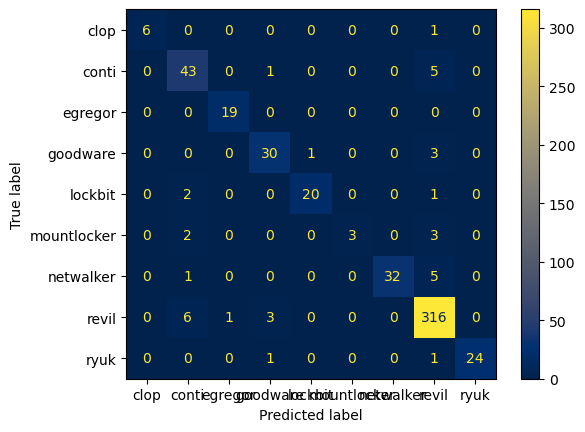

In [50]:
# MLP com Grid Search CV StandardScaler
modelmlp_pca = MLPClassifier(hidden_layer_sizes=(40,150,20), max_iter=50, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp_pca.fit(train_features_pca, train_labels)
predictmlp_pca = modelmlp_pca.predict(test_features_pca)
print(metrics.classification_report(test_labels, predictmlp_pca))


cm = metrics.confusion_matrix(test_labels, predictmlp_pca)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp_pca.classes_).plot(cmap='cividis')
%time